# DS-SF-34 | 09 | Linear Regression, Part 3 | Codealong | Starter Code

In [1]:
import os

import math
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

## Part A | Model Fit and Customer Retention

In [2]:
# TODO
train_df = pd.DataFrame({'t': range(8),
                         'survival_rate': [1., .869, .743, .653, .593, .551, .517, .491]},
                       columns = ['t', 'survival_rate'])

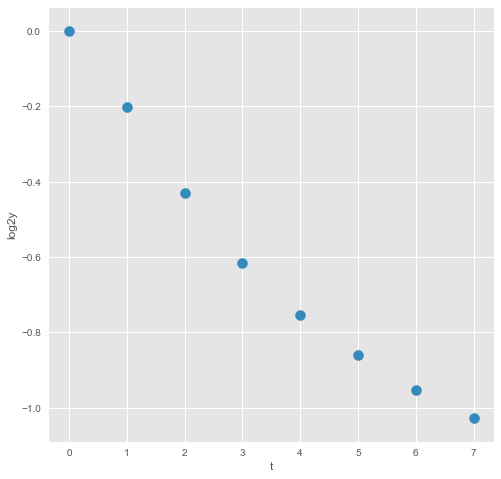

In [81]:
train_df.plot(kind = 'scatter', x = 't', y = 'log2y', s = 100, figsize = (8, 8))

In [83]:
train_df['t01'] = train_df['t']**0.1
train_df['t03'] = train_df['t']**0.3
train_df['t04'] = train_df['t']**0.4
train_df['t05'] = train_df['t']**0.5
train_df['t06'] = train_df['t']**0.6
train_df['t07'] = train_df['t']**0.7
train_df['t09'] = train_df['t']**0.9
train_df['lny'] = np.log(train_df['survival_rate'])
train_df['logy'] = np.log10(train_df['survival_rate'])
train_df['log2y'] = np.log2(train_df['survival_rate'])
train_df                    

,t,survival_rate,tt,t03,t05,...,t04,t06,logy,lny,log2y
0,0,1.000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0.869,1.000000,1.000000,1.000000,...,1.000000,1.000000,-0.060980,-0.140412,-0.202572
2,2,0.743,1.414214,1.231144,1.414214,...,1.319508,1.515717,-0.129011,-0.297059,-0.428566
3,3,0.653,1.732051,1.390389,1.732051,...,1.551846,1.933182,-0.185087,-0.426178,-0.614845
4,4,0.593,2.000000,1.515717,2.000000,...,1.741101,2.297397,-0.226945,-0.522561,-0.753896
5,5,0.551,2.236068,1.620657,2.236068,...,1.903654,2.626528,-0.258848,-0.596020,-0.859876
6,6,0.517,2.449490,1.711770,2.449490,...,2.047673,2.930156,-0.286509,-0.659712,-0.951764
7,7,0.491,2.645751,1.792790,2.645751,...,2.177906,3.214096,-0.308919,-0.711311,-1.026205


In [47]:
model = smf.ols(formula = 'survival_rate ~ t', data=train_df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          survival_rate   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     70.91
Date:                Mon, 15 May 2017   Prob (F-statistic):           0.000153
Time:                        19:07:10   Log-Likelihood:                 13.061
No. Observations:                   8   AIC:                            -22.12
Df Residuals:                       6   BIC:                            -21.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9254      0.035     26.258      0.000         0.839     1.012
t             -0.0709      0.008     -8.421      0.000        -0.092    -0.050
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   0.634
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.711
Skew:                           0.310   Prob(JB):                        0.701
Kurtosis:                       1.678   Cond. No.                         7.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
model = smf.ols(formula = 'survival_rate ~ t01', data=train_df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          survival_rate   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     13.24
Date:                Mon, 15 May 2017   Prob (F-statistic):             0.0109
Time:                        19:07:08   Log-Likelihood:                 7.5187
No. Observations:                   8   AIC:                            -11.04
Df Residuals:                       6   BIC:                            -10.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0431      0.108      9.682      0.000         0.779     1.307
t01           -0.3696      0.102     -3.639      0.011        -0.618    -0.121
==============================================================================
Omnibus:                        2.911   Durbin-Watson:                   1.072
Prob(Omnibus):                  0.233   Jarque-Bera (JB):                1.219
Skew:                           0.944   Prob(JB):                        0.544
Kurtosis:                       2.697   Cond. No.                         5.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
model = smf.ols(formula = 'survival_rate ~ t04', data=train_df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          survival_rate   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     142.8
Date:                Mon, 15 May 2017   Prob (F-statistic):           2.08e-05
Time:                        19:16:29   Log-Likelihood:                 15.702
No. Observations:                   8   AIC:                            -27.40
Df Residuals:                       6   BIC:                            -27.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0447      0.034     30.960      0.000         0.962     1.127
t04           -0.2505      0.021    -11.951      0.000        -0.302    -0.199
==============================================================================
Omnibus:                        5.184   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                1.602
Skew:                           1.080   Prob(JB):                        0.449
Kurtosis:                       3.378   Cond. No.                         5.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
model = smf.ols(formula = 'survival_rate ~ t05', data=train_df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          survival_rate   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     325.5
Date:                Mon, 15 May 2017   Prob (F-statistic):           1.87e-06
Time:                        19:07:30   Log-Likelihood:                 18.906
No. Observations:                   8   AIC:                            -33.81
Df Residuals:                       6   BIC:                            -33.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0245      0.021     47.916      0.000         0.972     1.077
t05           -0.2062      0.011    -18.042      0.000        -0.234    -0.178
==============================================================================
Omnibus:                        5.364   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                1.731
Skew:                           1.127   Prob(JB):                        0.421
Kurtosis:                       3.344   Cond. No.                         5.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
model = smf.ols(formula = 'survival_rate ~ t06', data=train_df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          survival_rate   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     405.3
Date:                Mon, 15 May 2017   Prob (F-statistic):           9.75e-07
Time:                        19:16:35   Log-Likelihood:                 19.768
No. Observations:                   8   AIC:                            -35.54
Df Residuals:                       6   BIC:                            -35.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0025      0.018     55.117      0.000         0.958     1.047
t06           -0.1677      0.008    -20.133      0.000        -0.188    -0.147
==============================================================================
Omnibus:                        0.763   Durbin-Watson:                   1.267
Prob(Omnibus):                  0.683   Jarque-Bera (JB):                0.628
Skew:                           0.440   Prob(JB):                        0.731
Kurtosis:                       1.947   Cond. No.                         5.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
model = smf.ols(formula = 'survival_rate ~ t09', data=train_df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          survival_rate   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     99.44
Date:                Mon, 15 May 2017   Prob (F-statistic):           5.89e-05
Time:                        19:07:45   Log-Likelihood:                 14.323
No. Observations:                   8   AIC:                            -24.65
Df Residuals:                       6   BIC:                            -24.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9421      0.031     30.129      0.000         0.866     1.019
t09           -0.0881      0.009     -9.972      0.000        -0.110    -0.066
==============================================================================
Omnibus:                        1.589   Durbin-Watson:                   0.619
Prob(Omnibus):                  0.452   Jarque-Bera (JB):                0.729
Skew:                           0.217   Prob(JB):                        0.695
Kurtosis:                       1.587   Cond. No.                         7.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

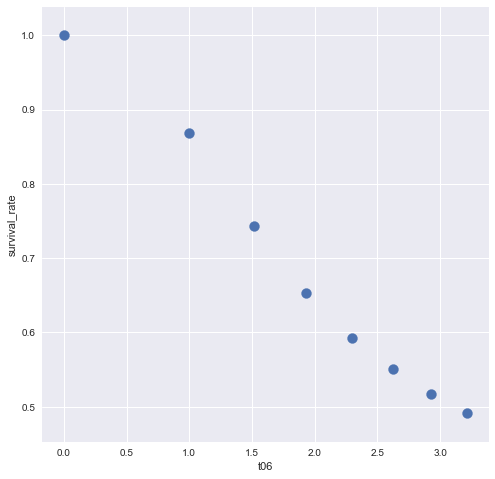

In [61]:
train_df.plot(kind = 'scatter', x = 't06', y = 'survival_rate', s = 100, figsize = (8, 8))

In [85]:
predict_df = pd.DataFrame({'t': [8,9,10,11,12],
                         'survival_rate': [1.,1.,1.,1.,1.,]},
                       columns = ['t', 'survival_rate'])
predict_df['survival_rate'] = 1.0025-0.1677*predict_df.t**0.6
predict_df
df = pd.concat([train_df,predict_df])
df

,lny,log2y,logy,survival_rate,t,...,t05,t06,t07,t09,tt
0,0.000000,0.000000,0.000000,1.000000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.140412,-0.202572,-0.060980,0.869000,1,...,1.000000,1.000000,1.000000,1.000000,1.000000
2,-0.297059,-0.428566,-0.129011,0.743000,2,...,1.414214,1.515717,1.624505,1.866066,1.414214
3,-0.426178,-0.614845,-0.185087,0.653000,3,...,1.732051,1.933182,2.157669,2.687875,1.732051
4,-0.522561,-0.753896,-0.226945,0.593000,4,...,2.000000,2.297397,2.639016,3.482202,2.000000
5,-0.596020,-0.859876,-0.258848,0.551000,5,...,2.236068,2.626528,3.085169,4.256700,2.236068
6,-0.659712,-0.951764,-0.286509,0.517000,6,...,2.449490,2.930156,3.505144,5.015753,2.449490
7,-0.711311,-1.026205,-0.308919,0.491000,7,...,2.645751,3.214096,3.904529,5.762199,2.645751
0,NaN,NaN,NaN,0.418535,8,...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,0.375773,9,...,NaN,NaN,NaN,NaN,NaN


In [87]:
test_df = pd.DataFrame({'t': range(8, 13),
                         'survival_rate': [.468, .445, .427, .409, .3943]},
                       columns = ['t', 'survival_rate'])
test_df

,t,survival_rate
0,8,0.4680
1,9,0.4450
2,10,0.4270
3,11,0.4090
4,12,0.3943


In [90]:
residual={}
residual['t'] = test_df['t'] - df['t']
residual

{'t': 0    8.0
 0    0.0
 1    8.0
 1    0.0
 2    8.0
 2    0.0
 3    8.0
 3    0.0
 4    8.0
 4    0.0
 5    NaN
 6    NaN
 7    NaN
 Name: t, dtype: float64}

## Part B | One-Hot Encoding for Categorical Variables and SF Housing

In [91]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-09-zillow.csv'), index_col = 'ID')

In [92]:
df.drop(df[df.IsAStudio == 1].index, inplace = True)

In [93]:
smf.ols(formula = 'SalePrice ~ Baths', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     146.6
Date:                Mon, 15 May 2017   Prob (F-statistic):           1.94e-31
Time:                        20:07:57   Log-Likelihood:                -1690.7
No. Observations:                 929   AIC:                             3385.
Df Residuals:                     927   BIC:                             3395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3401      0.099      3.434      0.001         0.146     0.535
Baths          0.5242      0.043     12.109      0.000         0.439     0.609
==============================================================================
Omnibus:                     1692.623   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2167434.305
Skew:                          12.317   Prob(JB):                         0.00
Kurtosis:                     238.345   Cond. No.                         5.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### What's the bathrooms' distribution in the dataset?

In [98]:
# TODO
# df.Baths.plot(kind = 'hist', figsize = (8, 8))
df['Baths'].value_counts().sort_index()

1.00     333
1.10       1
1.25       1
1.50      37
1.75       1
2.00     323
2.25       1
2.50      44
3.00     105
3.50      18
4.00      33
4.50       6
5.00      10
5.50       2
6.00       8
6.50       1
7.00       2
7.50       1
8.00       1
14.00      1
Name: Baths, dtype: int64

> ### Let's keep properties with 1, 2, 3, or 4 bathrooms

In [100]:
# TODO
df = df[df.Baths.isin([1,2,3,4])]
df.Baths.value_counts()

1.0    333
2.0    323
3.0    105
4.0     33
Name: Baths, dtype: int64

> ### Let's use `pandas`'s `get_dummies` to create a one-hot encoding of the `Bath` categorical feature

In [101]:
# TODO
baths_df = pd.get_dummies(df.Baths, prefix = 'Bath')

In [102]:
baths_df

,Bath_1.0,Bath_2.0,Bath_3.0,Bath_4.0
ID,,,,
15063505,0,1,0,0
15064044,1,0,0,0
15064257,0,1,0,0
15064295,0,1,0,0
15064391,1,0,0,0
15064536,0,1,0,0
15064669,0,0,1,0
15065032,1,0,0,0
15065140,1,0,0,0


In [103]:
baths_df.rename(columns = {'Bath_1.0': 'Bath_1',
    'Bath_2.0': 'Bath_2',
    'Bath_3.0': 'Bath_3',
    'Bath_4.0': 'Bath_4'}, inplace = True)

In [104]:
baths_df

,Bath_1,Bath_2,Bath_3,Bath_4
ID,,,,
15063505,0,1,0,0
15064044,1,0,0,0
15064257,0,1,0,0
15064295,0,1,0,0
15064391,1,0,0,0
15064536,0,1,0,0
15064669,0,0,1,0
15065032,1,0,0,0
15065140,1,0,0,0


In [105]:
df = df.join([baths_df])

In [106]:
df.columns

Index([u'Address', u'DateOfSale', u'SalePrice', u'IsAStudio', u'Beds',
       u'Baths', u'Size', u'LotSize', u'BuiltInYear', u'Bath_1', u'Bath_2',
       u'Bath_3', u'Bath_4'],
      dtype='object')

### Activity | Linear modeling using `Bath`'s one-hot encoding

> ### `SalesPrice` as a function of `Bath_2`, `Bath_3`, and `Bath_4`

In [107]:
# TODO
model = smf.ols(formula = 'SalePrice ~ Bath_2 + Bath_3 + Bath_4', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     11.78
Date:                Mon, 15 May 2017   Prob (F-statistic):           1.49e-07
Time:                        20:32:28   Log-Likelihood:                -1314.2
No. Observations:                 794   AIC:                             2636.
Df Residuals:                     790   BIC:                             2655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9914      0.070     14.249      0.000         0.855     1.128
Bath_2         0.2831      0.099      2.855      0.004         0.088     0.478
Bath_3         0.4808      0.142      3.383      0.001         0.202     0.760
Bath_4         1.2120      0.232      5.231      0.000         0.757     1.667
==============================================================================
Omnibus:                     1817.972   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8069883.811
Skew:                          19.917   Prob(JB):                         0.00
Kurtosis:                     495.280   Cond. No.                         5.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### `SalesPrice` as a function of `Bath_1`, `Bath_3`, and `Bath_4`

In [108]:
# TODO
model = smf.ols(formula = 'SalePrice ~ Bath_1 + Bath_3 + Bath_4', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     11.78
Date:                Mon, 15 May 2017   Prob (F-statistic):           1.49e-07
Time:                        20:32:56   Log-Likelihood:                -1314.2
No. Observations:                 794   AIC:                             2636.
Df Residuals:                     790   BIC:                             2655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.2745      0.071     18.040      0.000         1.136     1.413
Bath_1        -0.2831      0.099     -2.855      0.004        -0.478    -0.088
Bath_3         0.1977      0.143      1.386      0.166        -0.082     0.478
Bath_4         0.9290      0.232      4.003      0.000         0.473     1.384
==============================================================================
Omnibus:                     1817.972   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8069883.811
Skew:                          19.917   Prob(JB):                         0.00
Kurtosis:                     495.280   Cond. No.                         5.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### `SalesPrice` as a function of `Bath_1`, `Bath_2`, and `Bath_4`

In [109]:
# TODO
model = smf.ols(formula = 'SalePrice ~ Bath_1 + Bath_2 + Bath_4', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     11.78
Date:                Mon, 15 May 2017   Prob (F-statistic):           1.49e-07
Time:                        20:32:59   Log-Likelihood:                -1314.2
No. Observations:                 794   AIC:                             2636.
Df Residuals:                     790   BIC:                             2655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.4722      0.124     11.881      0.000         1.229     1.715
Bath_1        -0.4808      0.142     -3.383      0.001        -0.760    -0.202
Bath_2        -0.1977      0.143     -1.386      0.166        -0.478     0.082
Bath_4         0.7313      0.253      2.886      0.004         0.234     1.229
==============================================================================
Omnibus:                     1817.972   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8069883.811
Skew:                          19.917   Prob(JB):                         0.00
Kurtosis:                     495.280   Cond. No.                         7.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### `SalesPrice` as a function of `Bath_1`, `Bath_2`, and `Bath_3`

In [110]:
# TODO
model = smf.ols(formula = 'SalePrice ~ Bath_1 + Bath_2 + Bath_3', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     11.78
Date:                Mon, 15 May 2017   Prob (F-statistic):           1.49e-07
Time:                        20:33:02   Log-Likelihood:                -1314.2
No. Observations:                 794   AIC:                             2636.
Df Residuals:                     790   BIC:                             2655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.2035      0.221      9.969      0.000         1.770     2.637
Bath_1        -1.2120      0.232     -5.231      0.000        -1.667    -0.757
Bath_2        -0.9290      0.232     -4.003      0.000        -1.384    -0.473
Bath_3        -0.7313      0.253     -2.886      0.004        -1.229    -0.234
==============================================================================
Omnibus:                     1817.972   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8069883.811
Skew:                          19.917   Prob(JB):                         0.00
Kurtosis:                     495.280   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Part C | The Adverstising Dataset

In [111]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-09-advertising.csv'))

In [112]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


### Plots

> ### Sales ~ TV

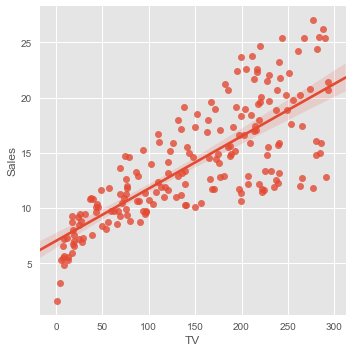

In [113]:
sns.lmplot(x = 'TV', y = 'Sales', data = df)

> ### Sales ~ Radio

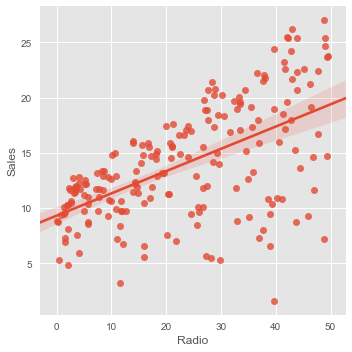

In [114]:
sns.lmplot(x = 'Radio', y = 'Sales', data = df)

> ### Sales ~ Newspaper

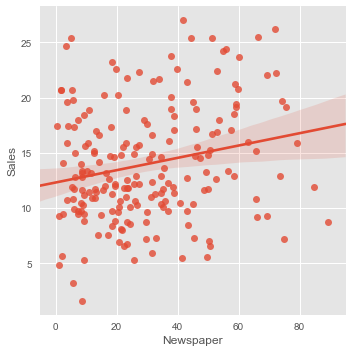

In [115]:
sns.lmplot(x = 'Newspaper', y = 'Sales', data = df)

### Simple linear regressions

> ### Sales ~ TV

In [116]:
model_tv = smf.ols(formula = 'Sales ~ TV', data = df).fit()

model_tv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     302.8
Date:                Mon, 15 May 2017   Prob (F-statistic):           1.29e-41
Time:                        21:03:23   Log-Likelihood:                -514.27
No. Observations:                 198   AIC:                             1033.
Df Residuals:                     196   BIC:                             1039.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0306      0.462     15.219      0.000         6.120     7.942
TV             0.0474      0.003     17.400      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.404   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.551
Skew:                          -0.062   Prob(JB):                        0.759
Kurtosis:                       2.774   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### Sales ~ Radio

In [117]:
model_radio = smf.ols(formula = 'Sales ~ Radio', data = df).fit()

model_radio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     97.69
Date:                Mon, 15 May 2017   Prob (F-statistic):           5.99e-19
Time:                        21:03:28   Log-Likelihood:                -566.70
No. Observations:                 198   AIC:                             1137.
Df Residuals:                     196   BIC:                             1144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.3166      0.560     16.622      0.000         8.211    10.422
Radio          0.2016      0.020      9.884      0.000         0.161     0.242
==============================================================================
Omnibus:                       20.193   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.115
Skew:                          -0.785   Prob(JB):                     9.56e-06
Kurtosis:                       3.582   Cond. No.                         51.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### Sales ~ Newspaper

In [118]:
model_newspaper = smf.ols(formula = 'Sales ~ Newspaper', data = df).fit()

model_newspaper.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     9.927
Date:                Mon, 15 May 2017   Prob (F-statistic):            0.00188
Time:                        21:03:30   Log-Likelihood:                -601.84
No. Observations:                 198   AIC:                             1208.
Df Residuals:                     196   BIC:                             1214.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     12.3193      0.639     19.274      0.000        11.059    13.580
Newspaper      0.0558      0.018      3.151      0.002         0.021     0.091
==============================================================================
Omnibus:                        5.835   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.303
Skew:                           0.333   Prob(JB):                       0.0706
Kurtosis:                       2.555   Cond. No.                         63.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Residuals

> ### Sales ~ TV

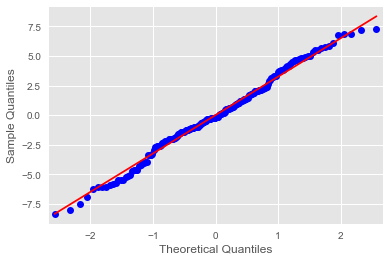

In [119]:
sm.qqplot(model_tv.resid, line = 's')

pass

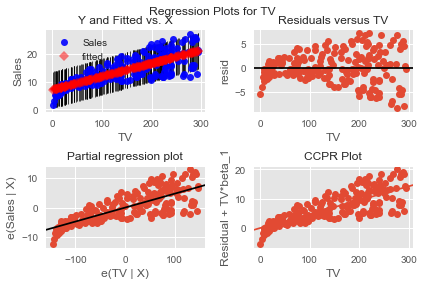

In [120]:
sm.graphics.plot_regress_exog(model_tv, 'TV')
# variance is not constant.  can do better.

pass

> ### Sales ~ Radio

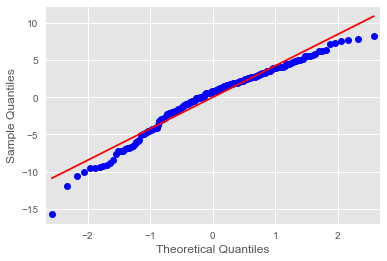

In [121]:
sm.qqplot(model_radio.resid, line = 's')

pass

In [ ]:
sm.graphics.plot_regress_exog(model_radio, 'Radio')

pass

> ### Sales ~ Newspaper

In [ ]:
sm.qqplot(model_newspaper.resid, line = 's')

pass

In [ ]:
sm.graphics.plot_regress_exog(model_newspaper, 'Newspaper')

pass

> ### Sales ~ TV + Radio + Newspaper

In [122]:
# TODO

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     11.78
Date:                Mon, 15 May 2017   Prob (F-statistic):           1.49e-07
Time:                        21:07:36   Log-Likelihood:                -1314.2
No. Observations:                 794   AIC:                             2636.
Df Residuals:                     790   BIC:                             2655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.2035      0.221      9.969      0.000         1.770     2.637
Bath_1        -1.2120      0.232     -5.231      0.000        -1.667    -0.757
Bath_2        -0.9290      0.232     -4.003      0.000        -1.384    -0.473
Bath_3        -0.7313      0.253     -2.886      0.004        -1.229    -0.234
==============================================================================
Omnibus:                     1817.972   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8069883.811
Skew:                          19.917   Prob(JB):                         0.00
Kurtosis:                     495.280   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### Sales ~ TV + Radio

In [123]:
# TODO

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     11.78
Date:                Mon, 15 May 2017   Prob (F-statistic):           1.49e-07
Time:                        21:07:40   Log-Likelihood:                -1314.2
No. Observations:                 794   AIC:                             2636.
Df Residuals:                     790   BIC:                             2655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.2035      0.221      9.969      0.000         1.770     2.637
Bath_1        -1.2120      0.232     -5.231      0.000        -1.667    -0.757
Bath_2        -0.9290      0.232     -4.003      0.000        -1.384    -0.473
Bath_3        -0.7313      0.253     -2.886      0.004        -1.229    -0.234
==============================================================================
Omnibus:                     1817.972   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8069883.811
Skew:                          19.917   Prob(JB):                         0.00
Kurtosis:                     495.280   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

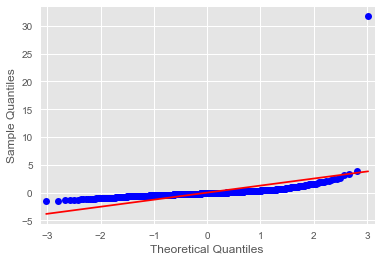

In [124]:
sm.qqplot(model.resid, line = 's')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'TV')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'Radio')

pass

## Part D | Interaction Effects and Advertising

### Sales ~ TV + Radio + TV * Radio

In [125]:
model = smf.ols(formula = 'Sales ~ TV + Radio + TV * Radio', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1934.
Date:                Mon, 15 May 2017   Prob (F-statistic):          3.19e-144
Time:                        21:09:56   Log-Likelihood:                -267.07
No. Observations:                 198   AIC:                             542.1
Df Residuals:                     194   BIC:                             555.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.7577      0.247     27.304      0.000         6.270     7.246
TV             0.0190      0.002     12.682      0.000         0.016     0.022
Radio          0.0276      0.009      3.089      0.002         0.010     0.045
TV:Radio       0.0011   5.27e-05     20.817      0.000         0.001     0.001
==============================================================================
Omnibus:                      126.182   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1151.060
Skew:                          -2.306   Prob(JB):                    1.12e-250
Kurtosis:                      13.875   Cond. No.                     1.78e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

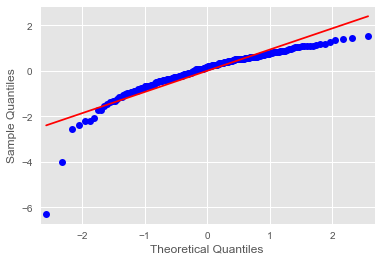

In [126]:
sm.qqplot(model.resid, line = 's')

pass

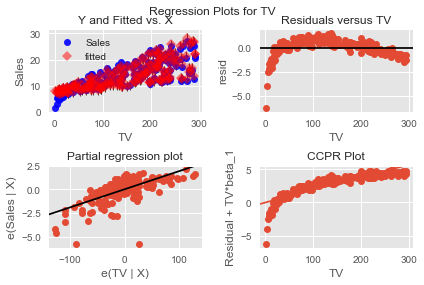

In [127]:
sm.graphics.plot_regress_exog(model, 'TV')

pass

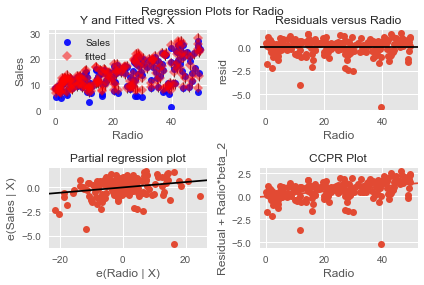

In [128]:
sm.graphics.plot_regress_exog(model, 'Radio')

pass

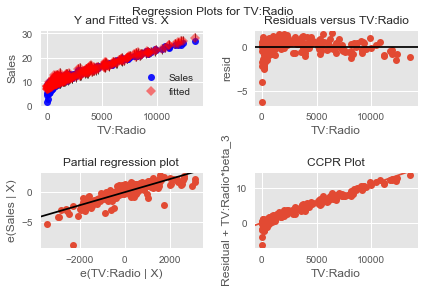

In [129]:
sm.graphics.plot_regress_exog(model, 'TV:Radio')

pass